# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [54]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [55]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig
import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.normality as cplonorm
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.test.test_plots as cptetepl
import core.plotting.correlation as cplocorr
import dataflow.model.test.test_model_plotter as dmtetemopl

import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

In [56]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.6.0' != container_version='1.5.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask455_Unit_test_plot_qq_function'
  hash='0b8199b46'
  # Last commits:
    * 0b8199b46 Sameep2808 Adding smoke tests for plot_qq #455                               (  18 hours ago) Mon Aug 28 22:57:13 2023  (HEAD -> SorrTask455_Unit_test_plot_qq_function, origin/SorrTask455_Unit_test_plot_qq_function)
    * c005e21c8 Nina Lee fix_fast_tests (#556)                                             (  22 hours ago) Mon Aug 28 19:28:39 2023  (origin/master, origin/SorrTask541_Introduce_apply_columns_mode, origin/HEAD)
    * edbd2a213 GP Saggese Update doc                           

# Build config

In [57]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [58]:
test_srs = cptetepl.Test_plots.get_test_plot_srs1()
lag = 7

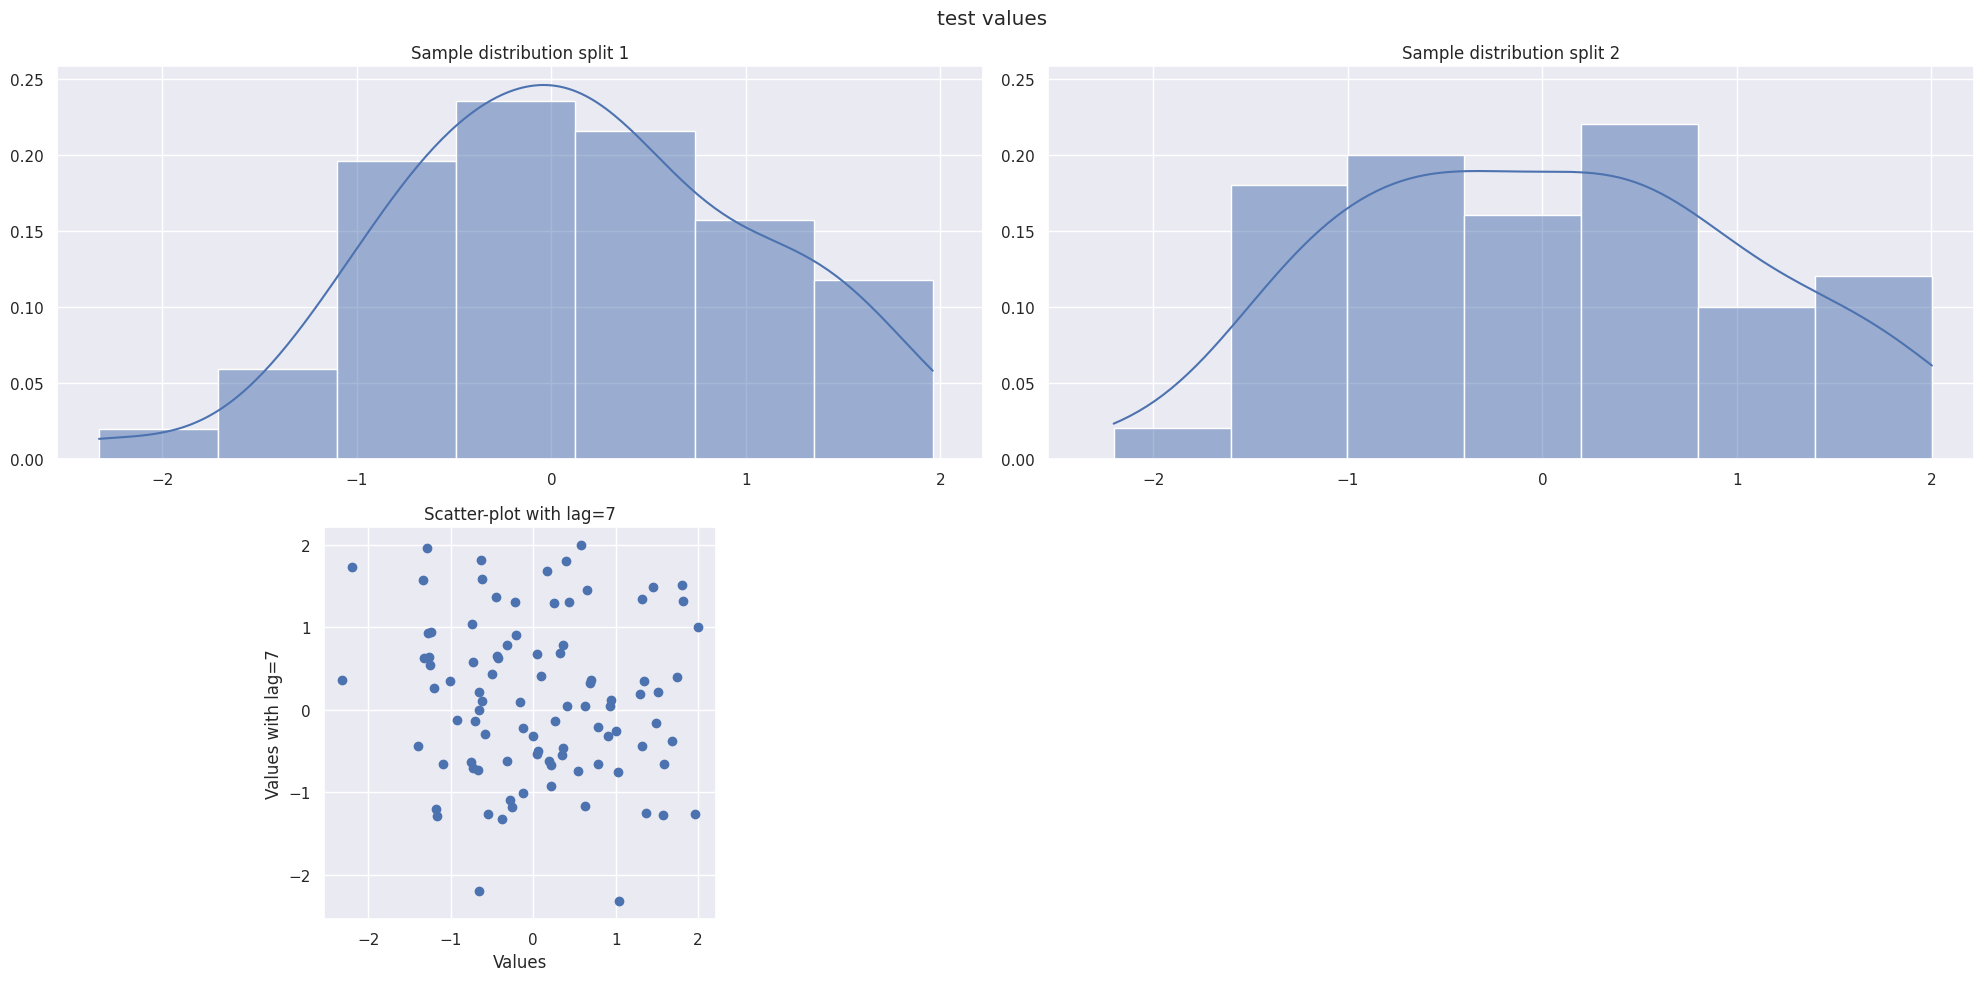

In [59]:
cpvistte.plot_histograms_and_lagged_scatterplot(
    test_srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

In [60]:
test_srs = cptetepl.Test_plots.get_test_plot_srs1()

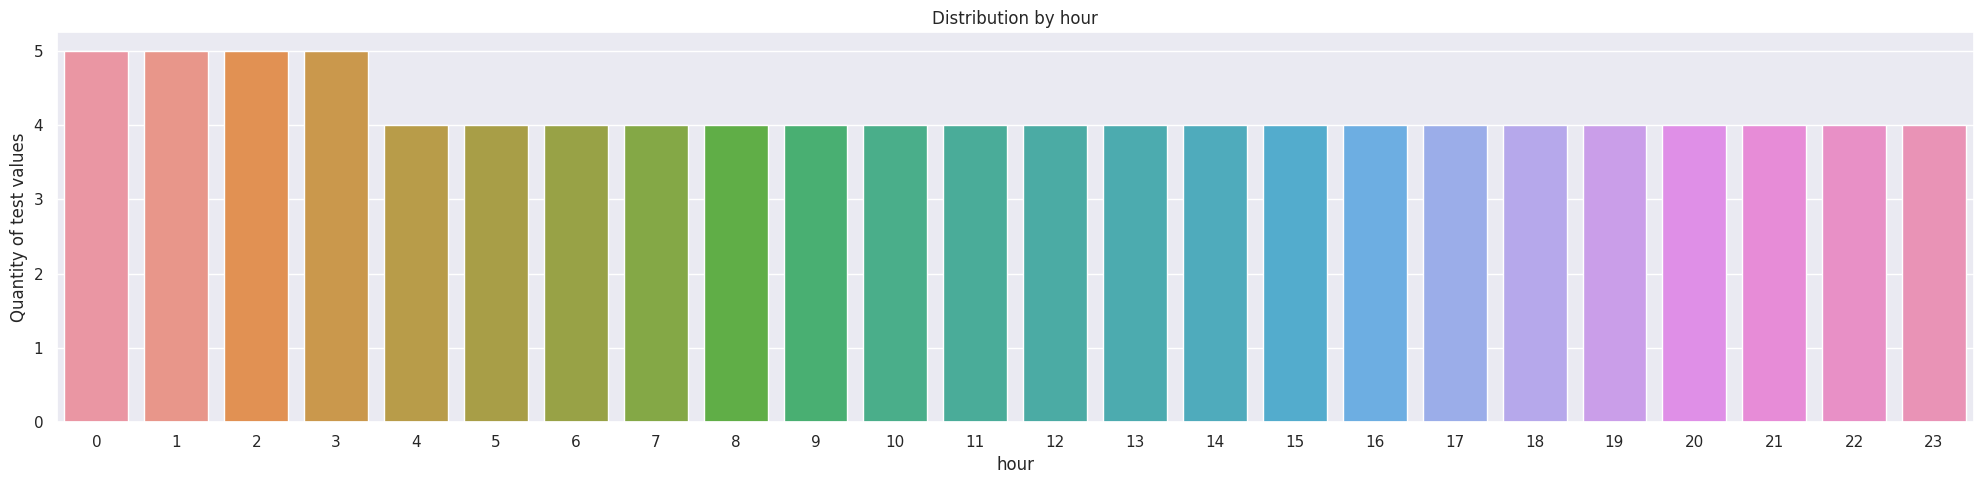

In [61]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

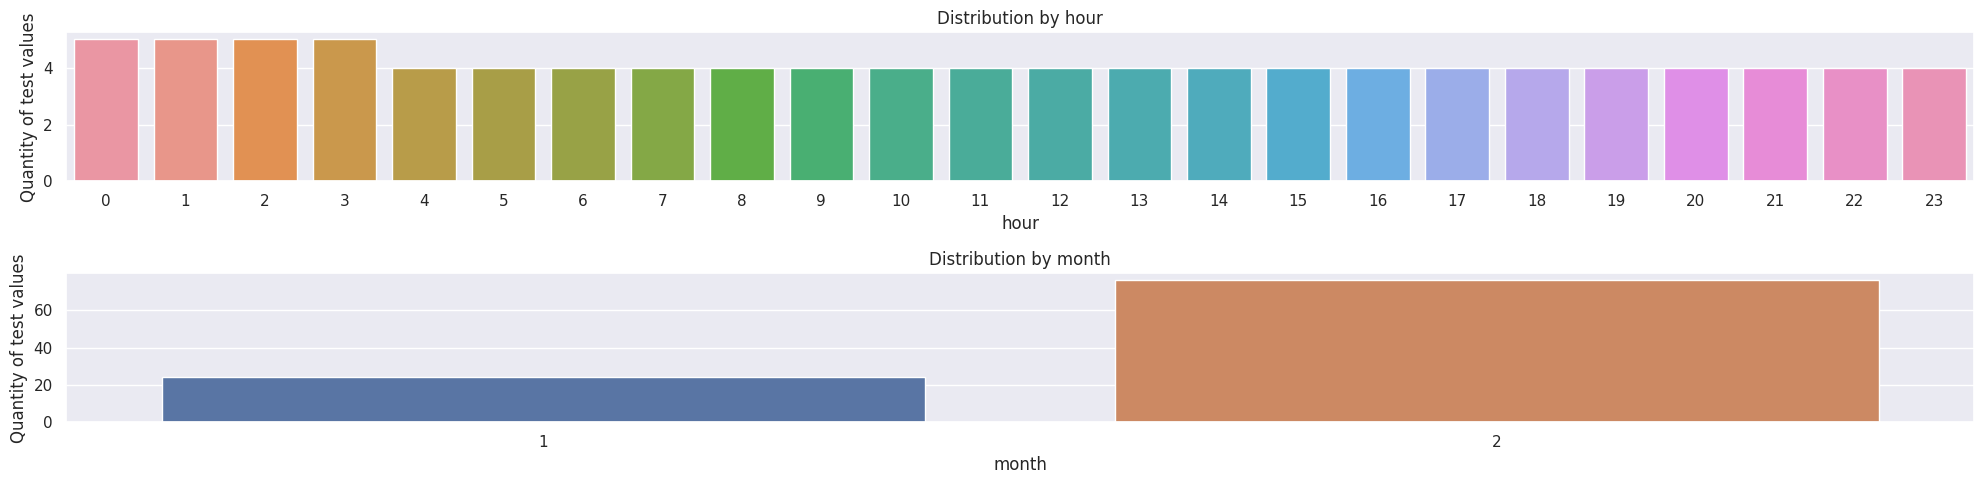

In [62]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

## `plot_time_series_by_period()`

In [63]:
test_srs = cptetepl.Test_plots.get_test_plot_srs1()

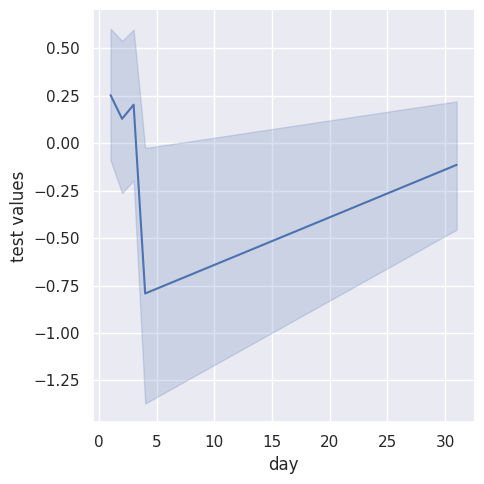

In [64]:
period = "day"
cplmiplo.plot_time_series_by_period(test_srs, period)

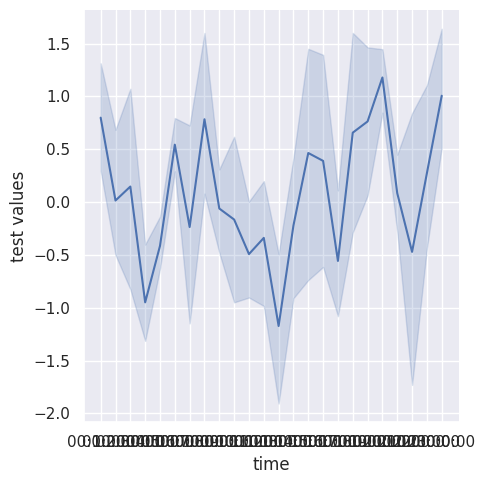

In [65]:
period = "time"
cplmiplo.plot_time_series_by_period(test_srs, period)

## `plot_heatmap()`

In [66]:
mode = "clustermap"
test_df = cptetepl.Test_plots.get_test_plot_df1()

WARNING The corr_df.shape[0]='100' > 20


/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


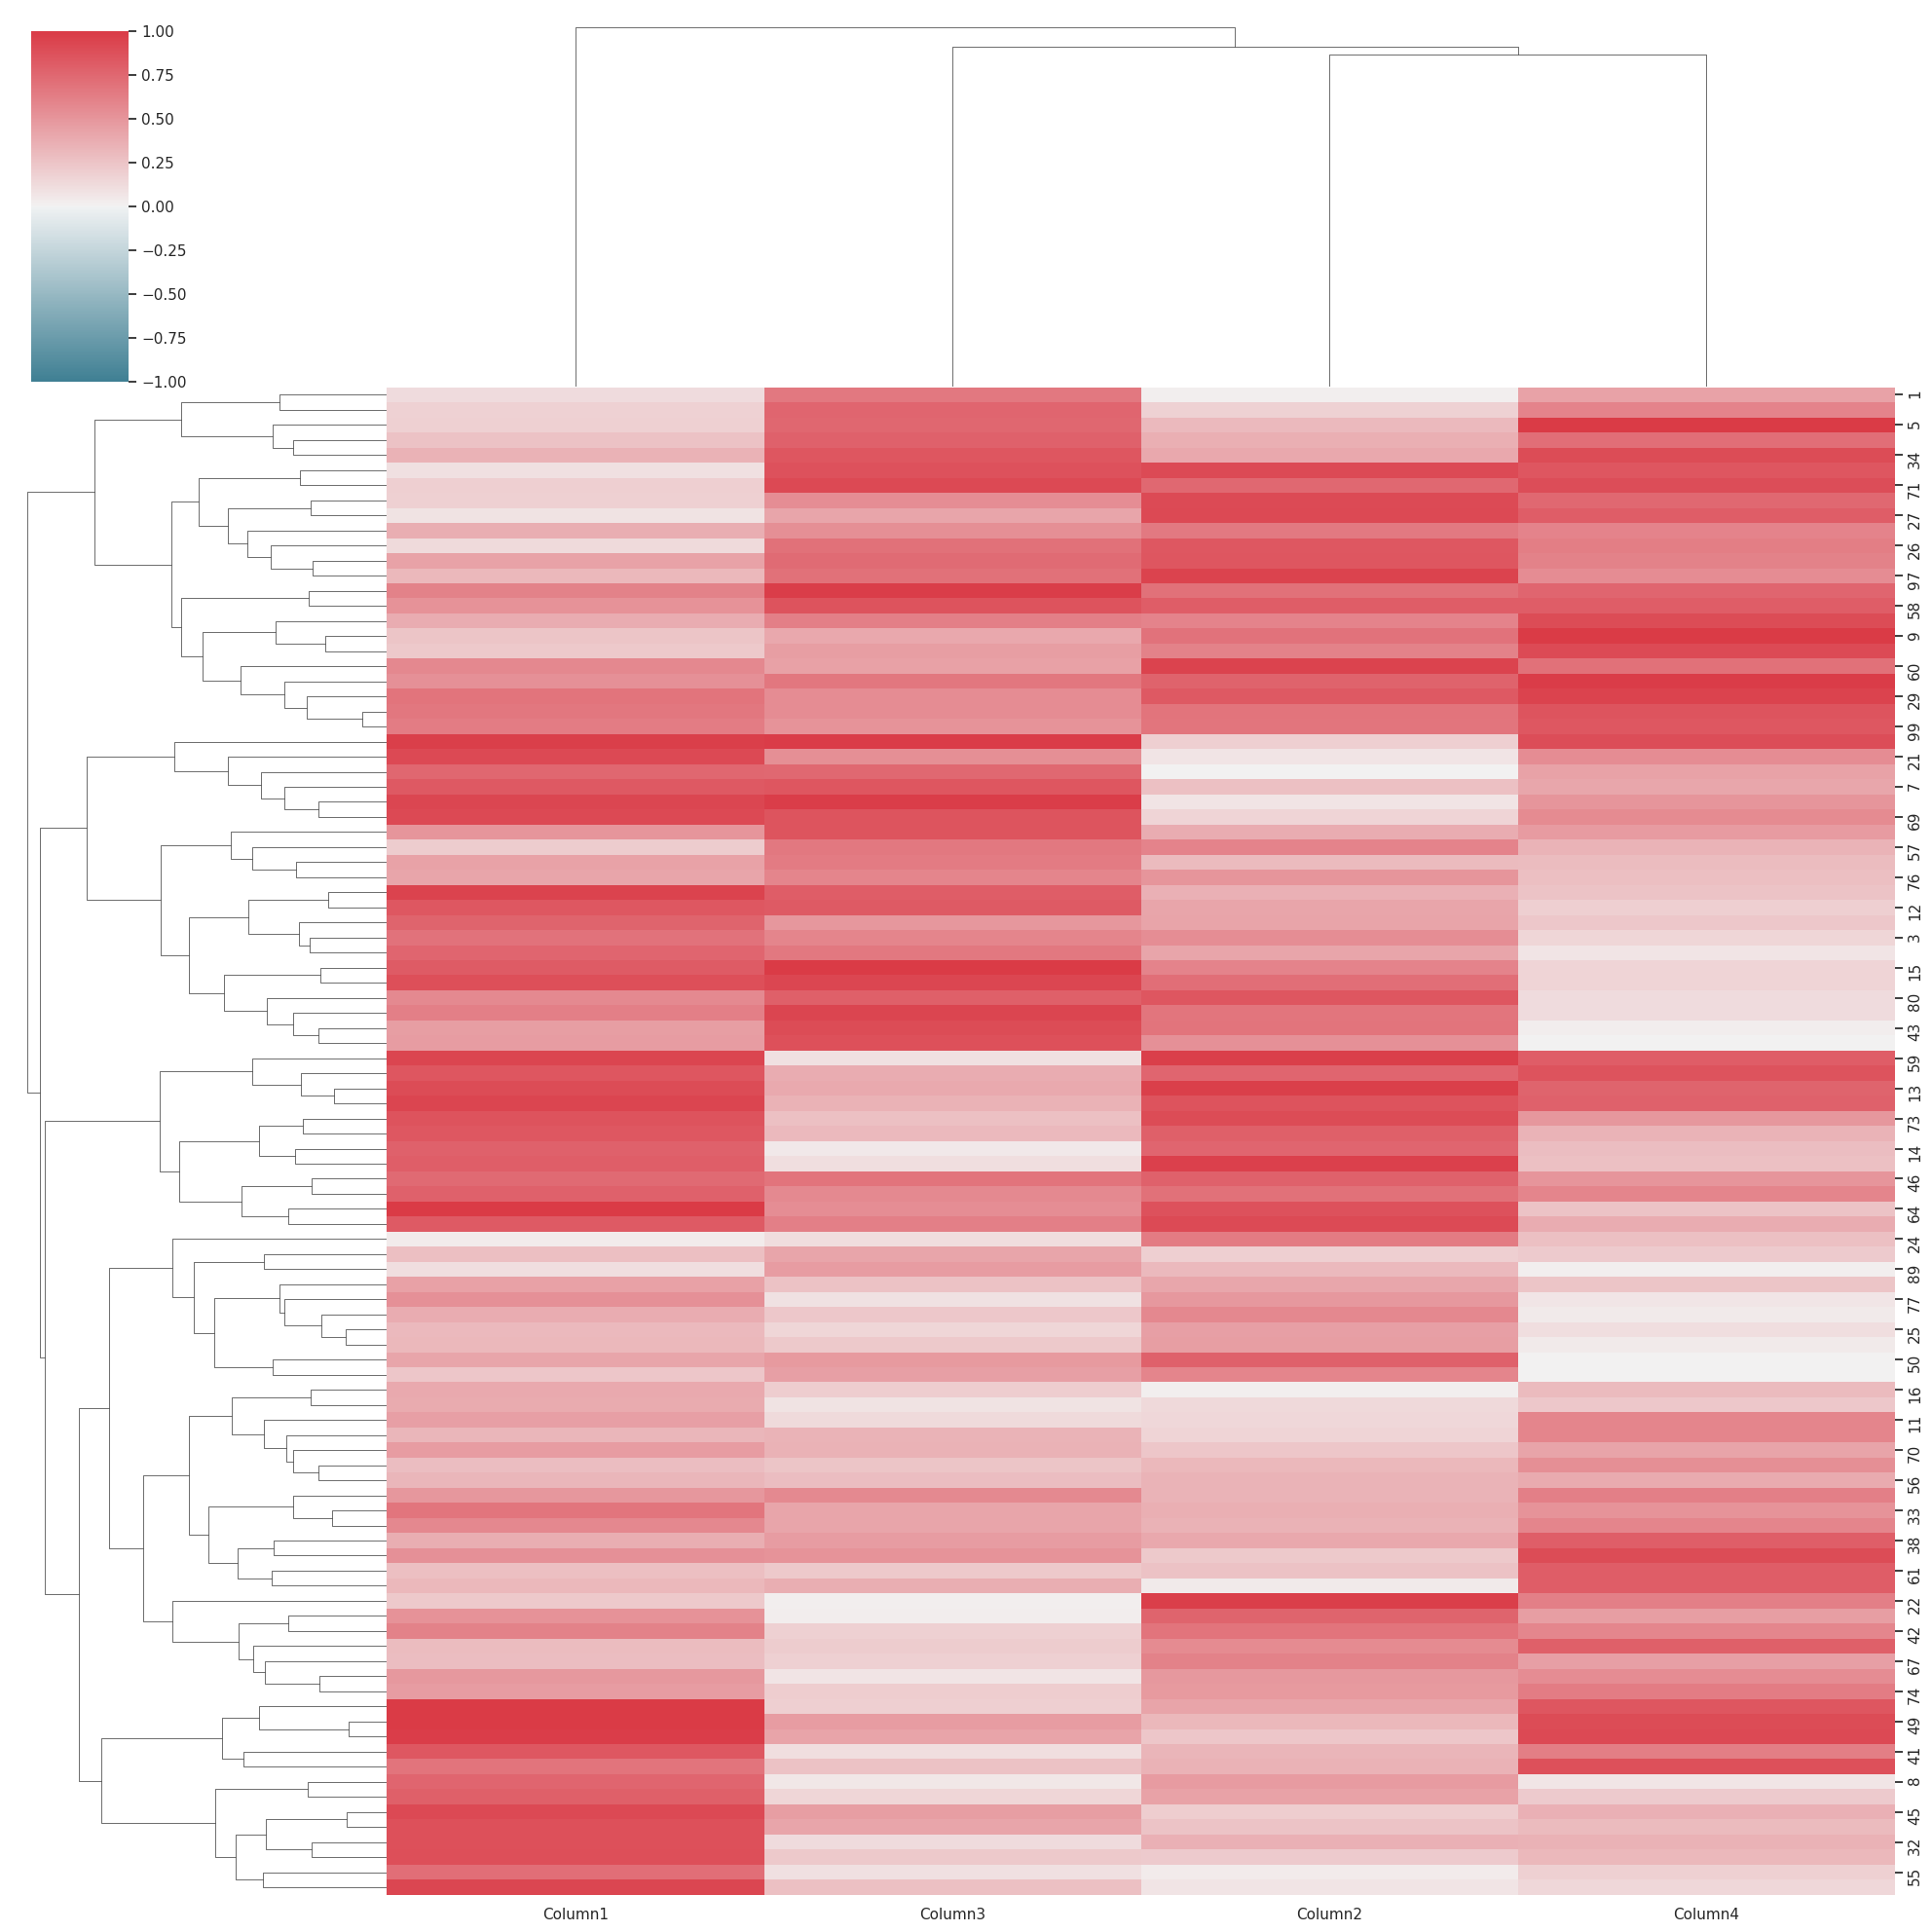

In [67]:
cplocorr.plot_heatmap(test_df, mode, figsize=config["figsize"])

## `plot_performance()`

In [68]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.507GB vms=3.927GB mem_pct=7%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.508GB vms=3.927GB mem_pct=7%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


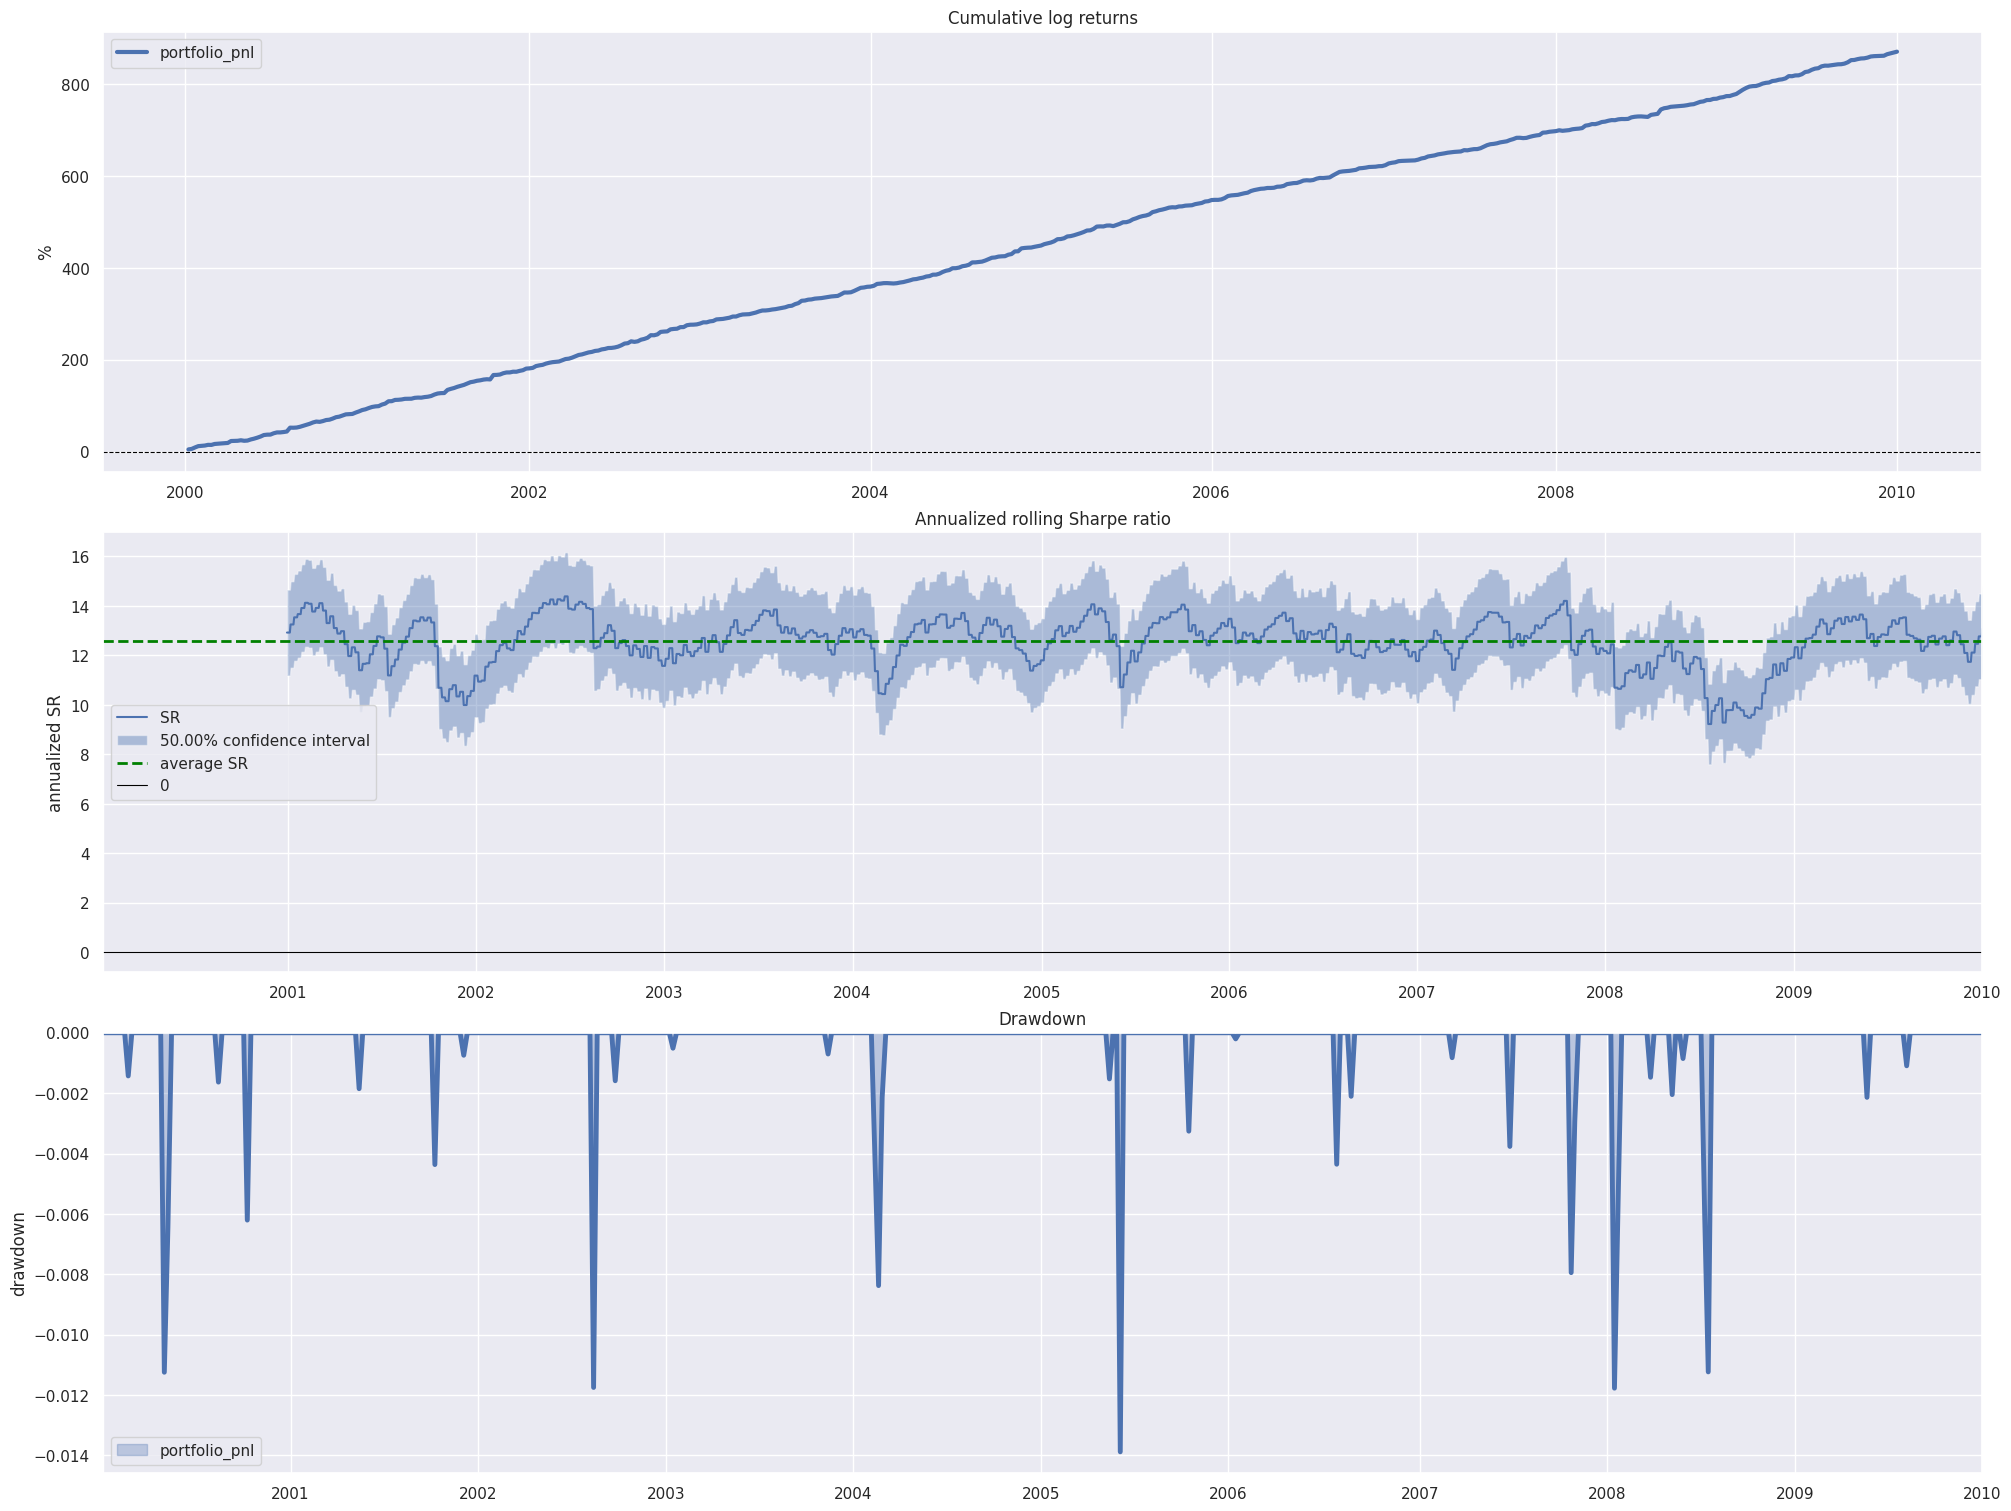

In [69]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

In [70]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.539GB vms=3.957GB mem_pct=7%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.539GB vms=3.957GB mem_pct=7%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


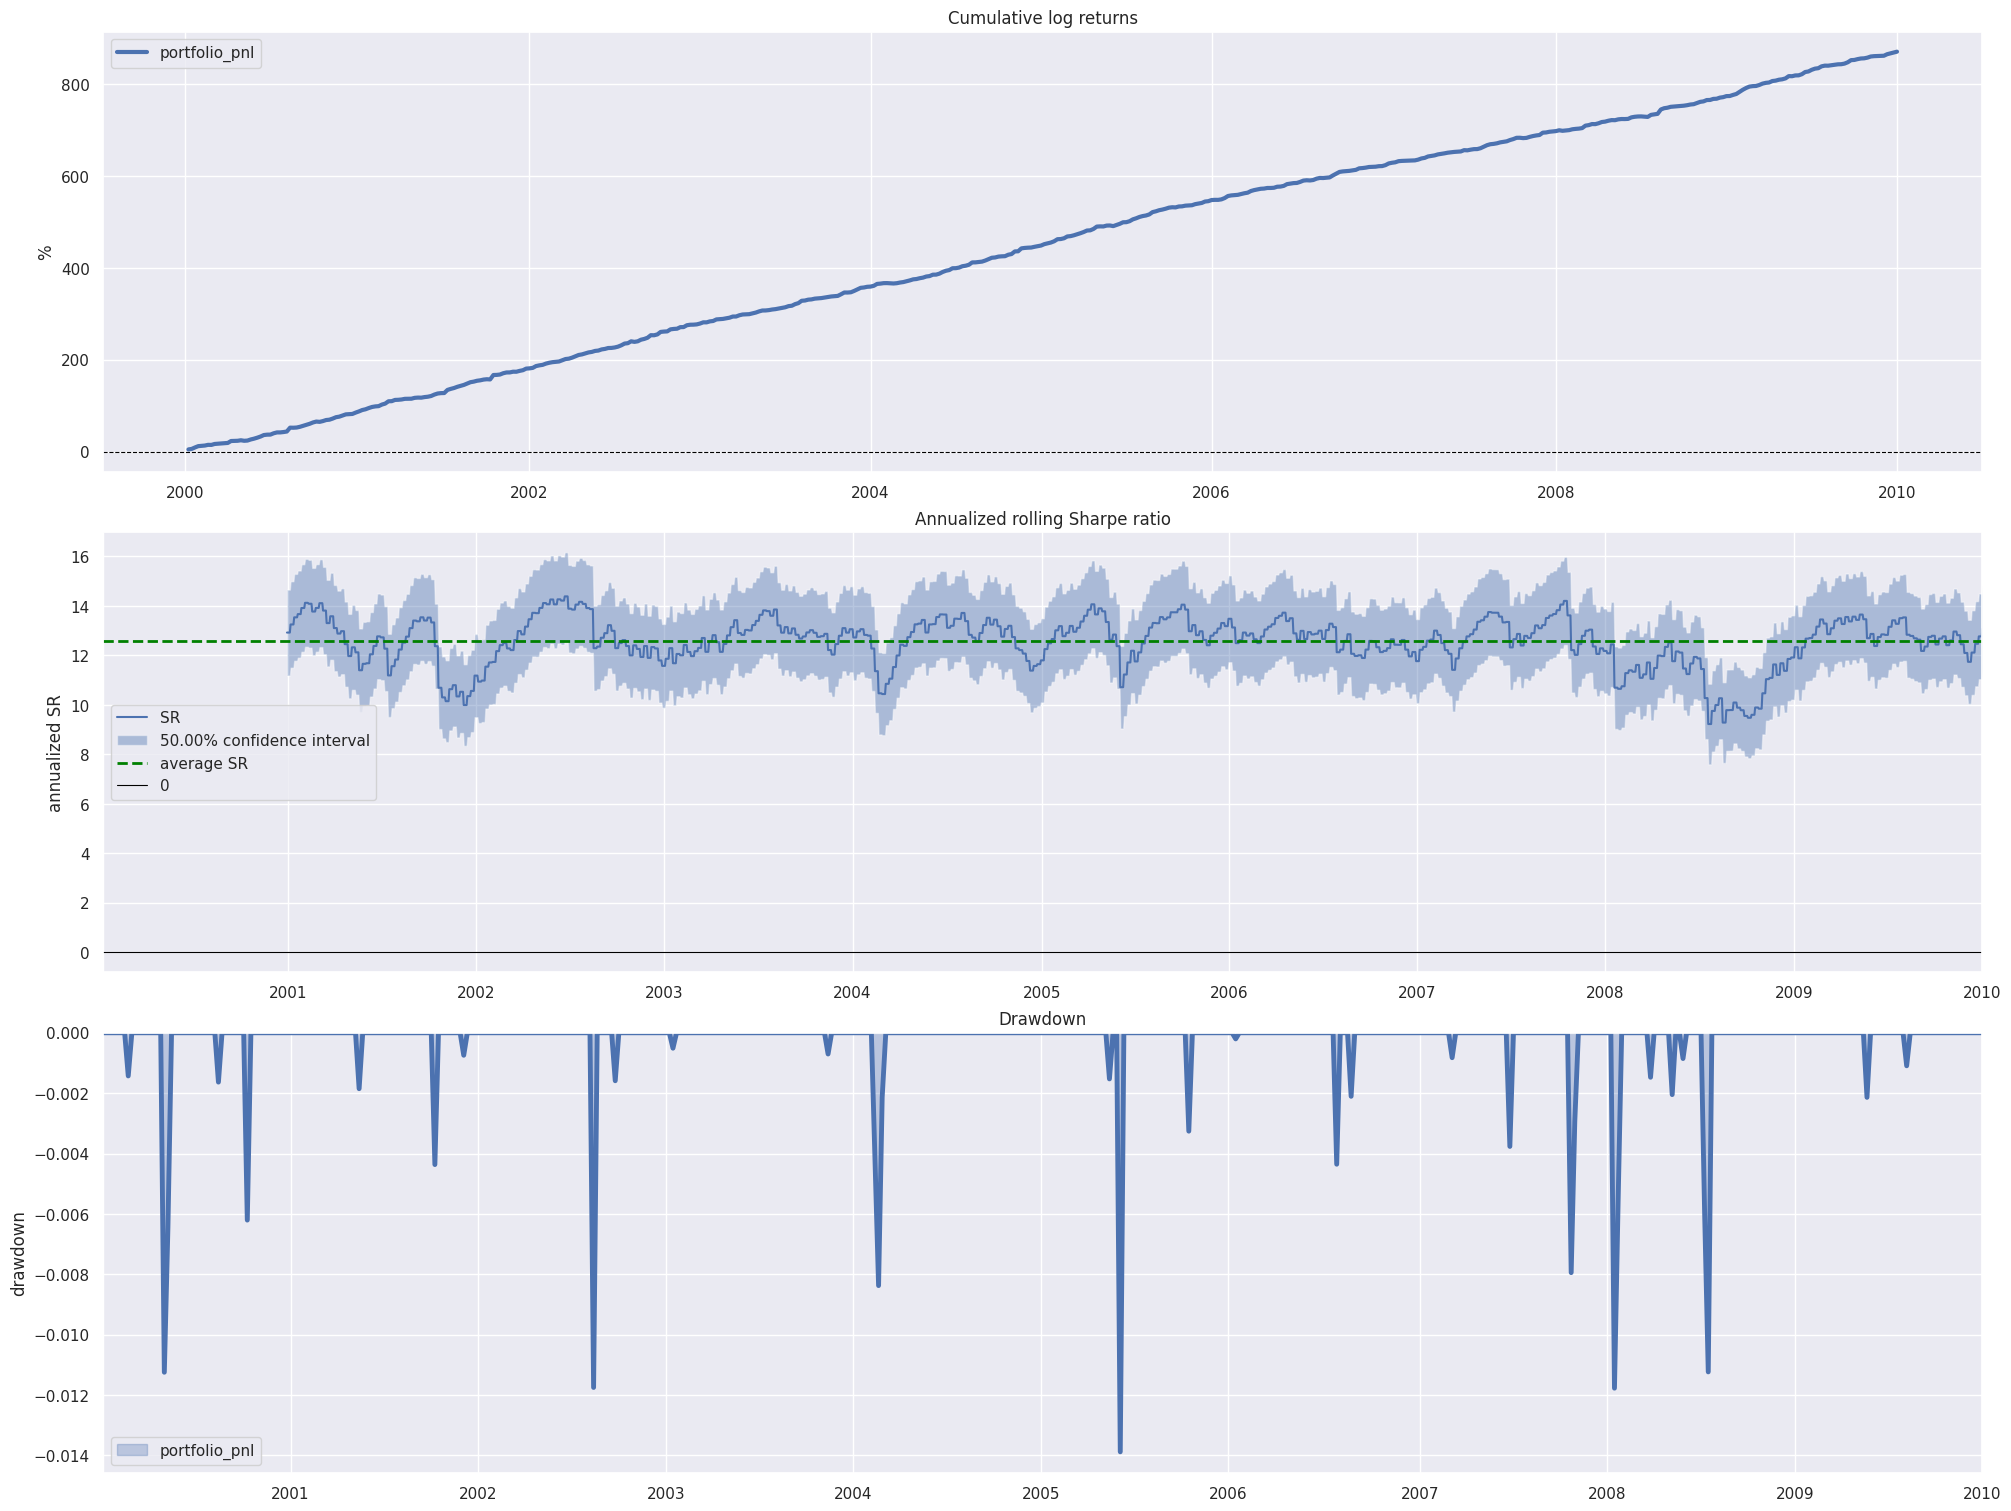

In [71]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

In [72]:
test_df = cptetepl.Test_plots.get_test_plot_df1()

[3.89447756069739, 3.8051325687995714, 3.175783432459224]

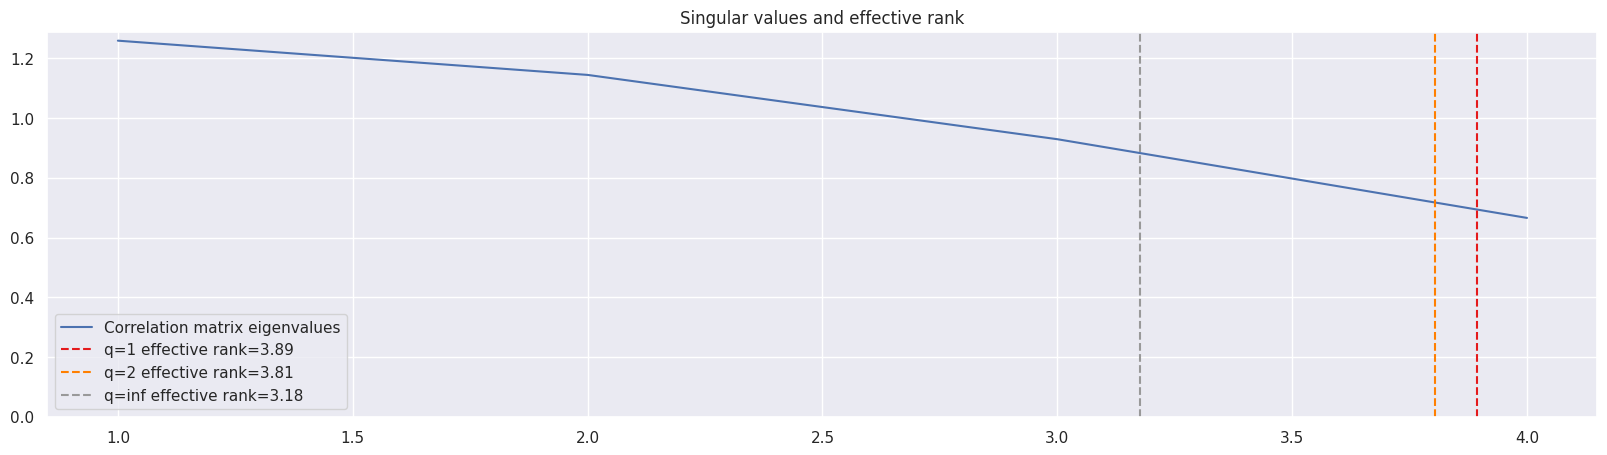

In [73]:
cplocorr.plot_effective_correlation_rank(test_df)

[3.5252092893164937,
 3.5256027630696116,
 3.5485605581051023,
 3.545623985494911,
 3.787706388745869]

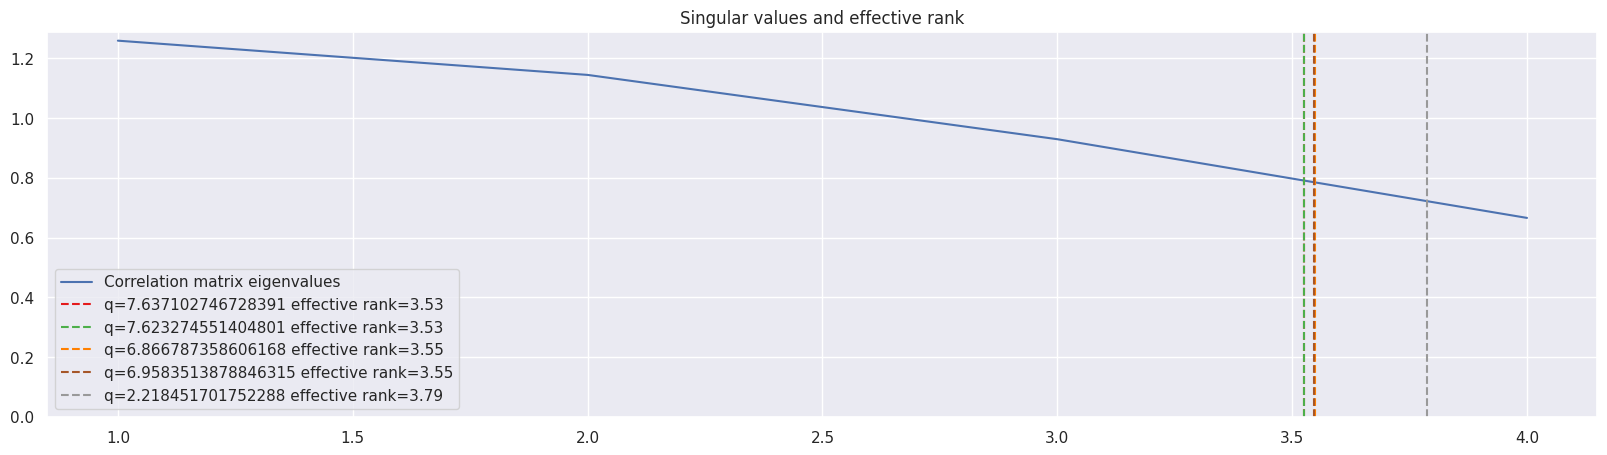

In [74]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [75]:
test_df = cptetepl.Test_plots.get_test_plot_df1()

/venv/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


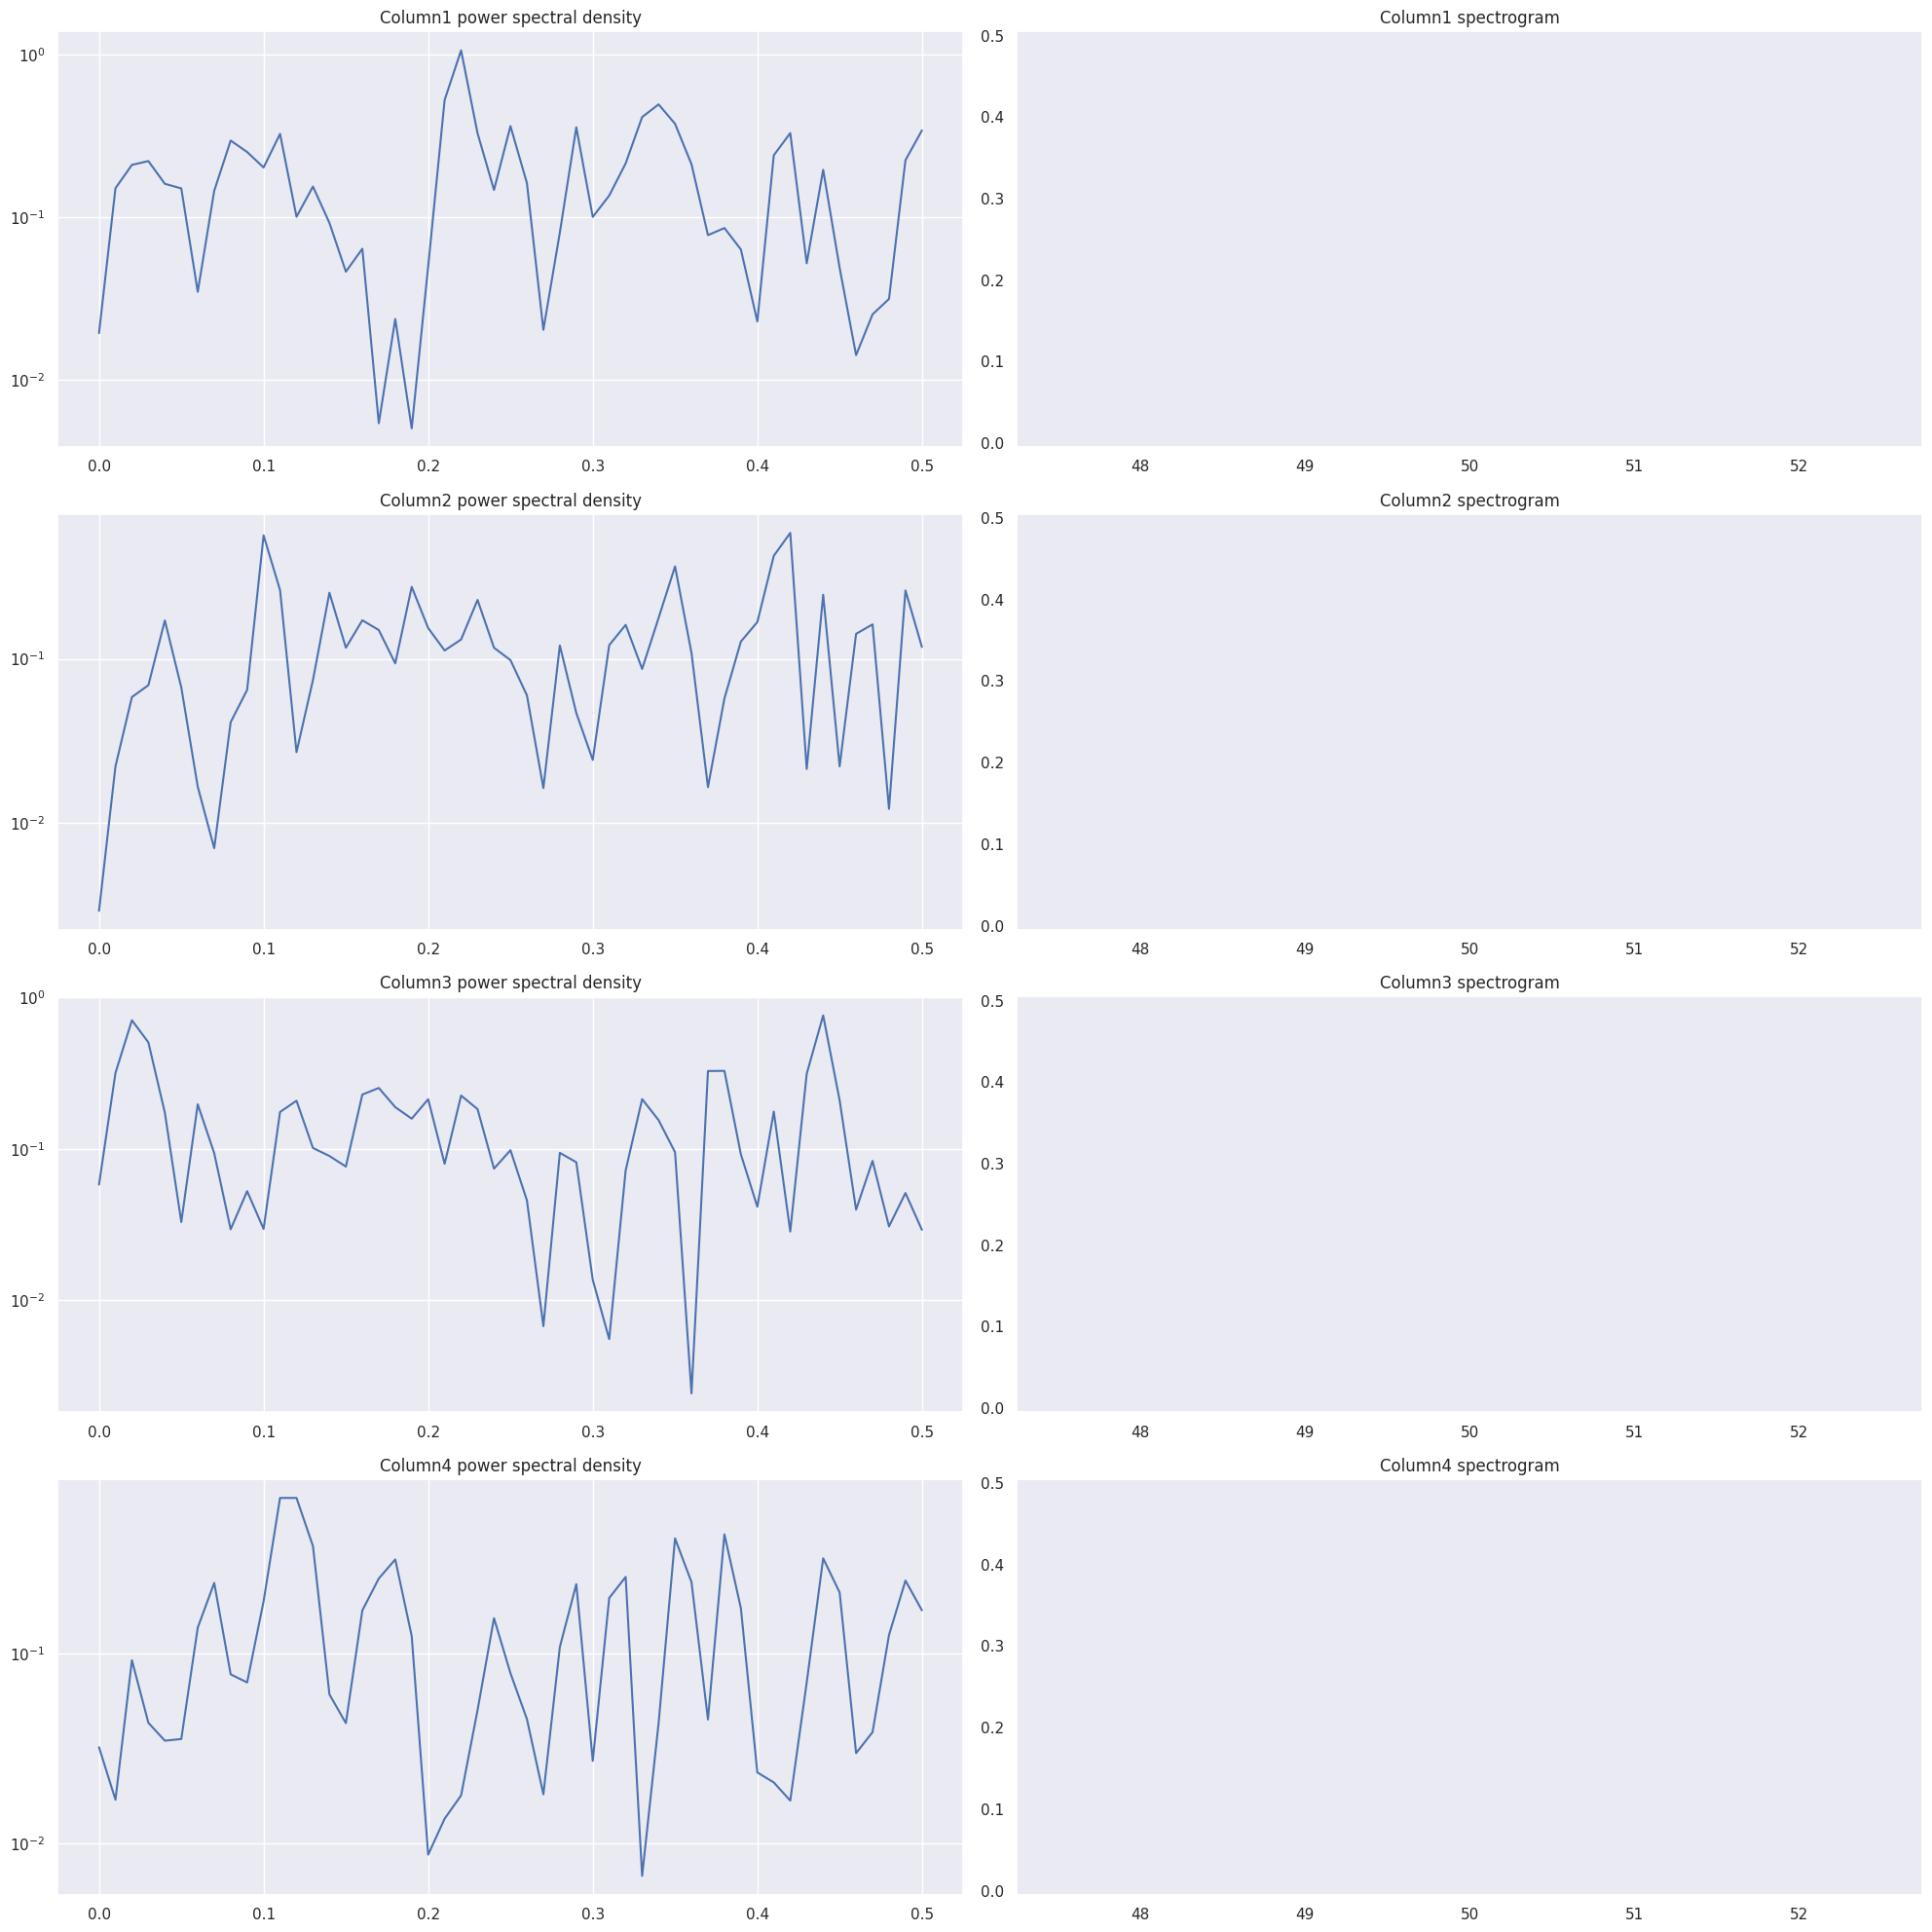

In [76]:
cplmiplo.plot_spectrum(test_df)

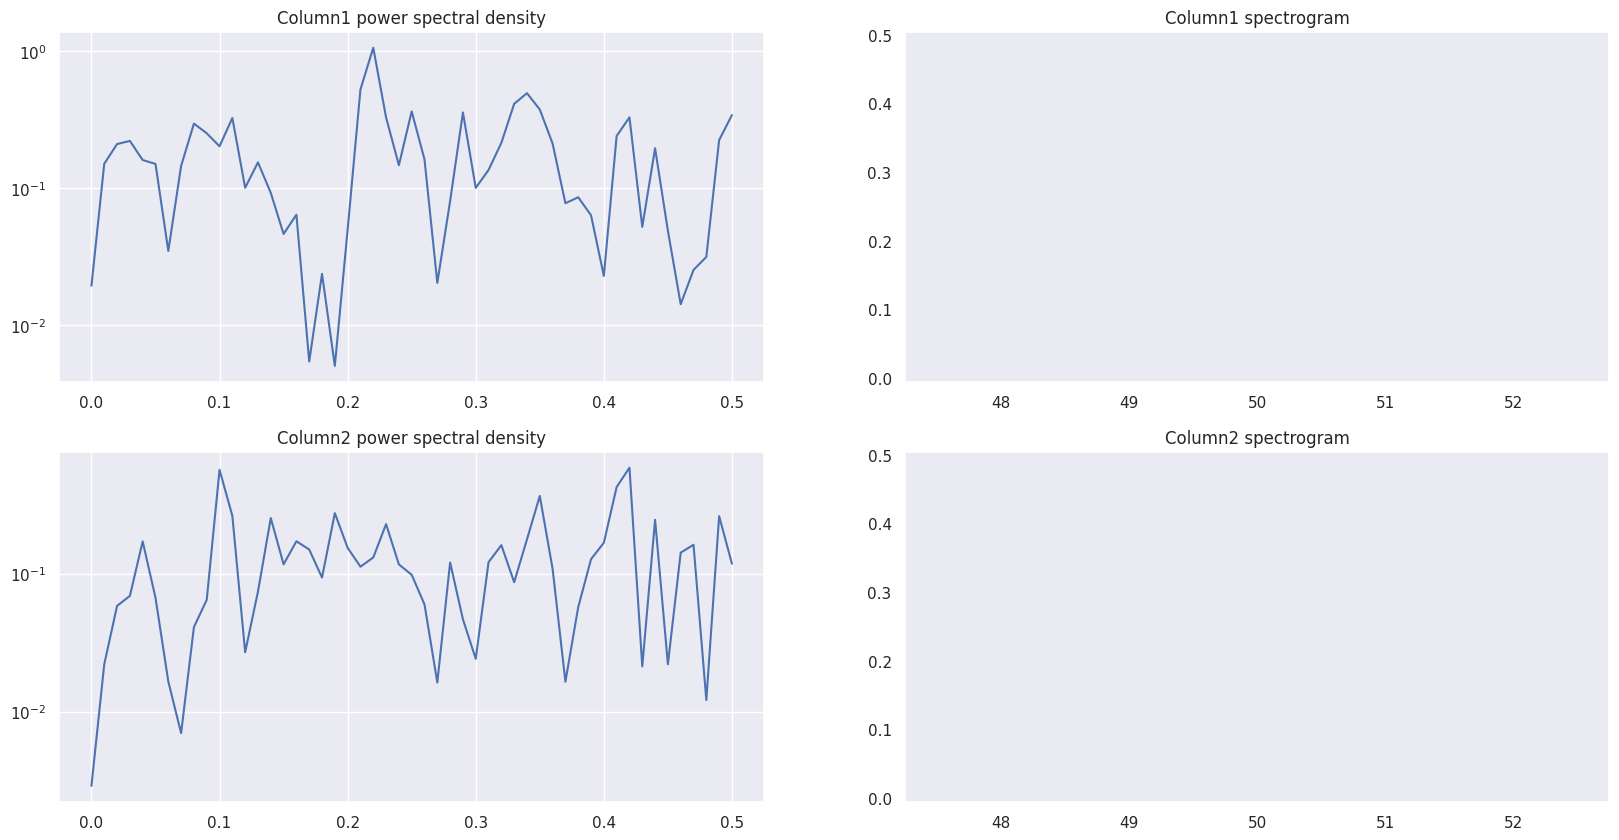

In [77]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

## `plot_qq()`

In [78]:
test_series = cptetepl.Test_plots.get_test_plot_srs1()

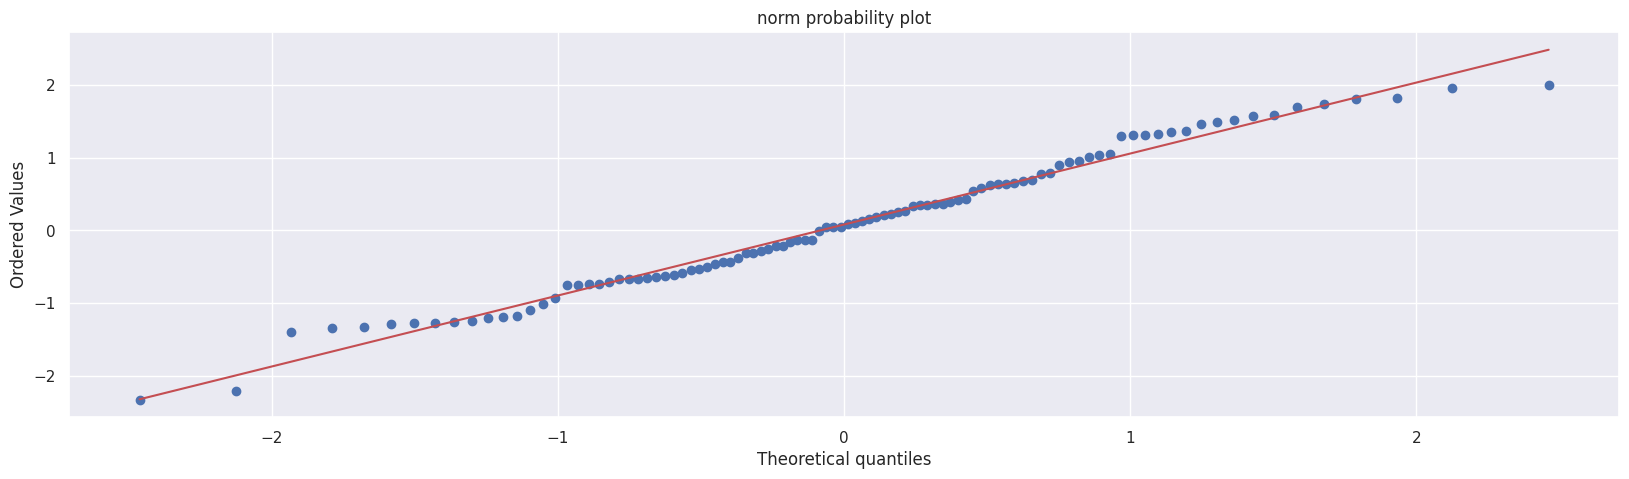

In [79]:
cplonorm.plot_qq(test_series)

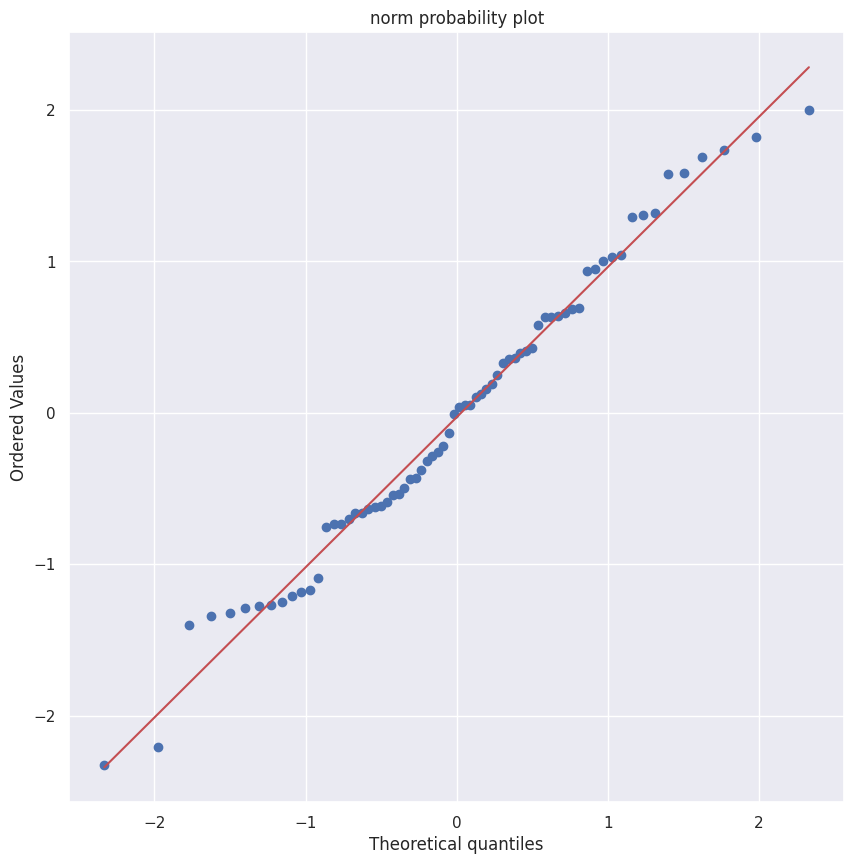

In [80]:
test_series[20:50] = np.nan
_, axes = plt.subplots(1, 1, figsize=(10,10))
cplonorm.plot_qq(test_series, ax=axes, dist="norm", nan_mode="drop")